In [1]:
import time
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [75]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelBinarizer

In [76]:
features_train = pd.read_csv('features_train_new.csv')
features_val = pd.read_csv('features_val_new.csv')

C:\Users\rafae\Anaconda3\envs\tf_vggface\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [169]:
features_train['eor_logical'] = features_train['eor'].astype('category')
features_val['eor_logical'] = features_val['eor'].astype('category')

features_train['point_logical'] = features_train['point'].astype('category')
features_val['point_logical'] = features_val['point'].astype('category')

features_train.head()

,Unnamed: 0,eor,id,point,image,ir1,5,6,7,8,...,1532,1533,1534,1535,1536,1537,1538,1539,eor_logical,point_logical
0,0,1,1,13,1,0.988739,2.039143,0.248262,0.000000,0.0,...,0.979391,0.000000,0.191572,9.335439,2.135622,0.0,0.0,0.151517,1,13
1,1,1,1,13,101,0.894081,2.578938,0.191407,0.049469,0.0,...,0.721870,0.000000,3.122820,11.810625,1.903937,0.0,0.0,0.008059,1,13
2,2,1,1,13,11,0.989725,2.077088,0.221179,0.001518,0.0,...,1.313927,0.533755,0.000000,12.853697,1.508735,0.0,0.0,0.382692,1,13
3,3,1,1,13,111,0.886810,2.305444,0.194974,0.005231,0.0,...,1.246013,0.000000,0.000000,9.329632,3.481939,0.0,0.0,0.472956,1,13
4,4,1,1,13,121,0.752678,2.417488,0.181901,0.000000,0.0,...,1.290691,0.000000,0.687830,8.111677,3.262325,0.0,0.0,0.267931,1,13


In [170]:
print(features_train.shape, features_val.shape)

(10620, 1543) (4304, 1543)


In [171]:
ytrain = features_train[features_train['eor_logical'] == 1]['eor_logical']

In [172]:
ytrain = pd.concat([ytrain,ytrain], axis =0)
ytrain.shape

(7052,)

In [173]:
xtrain = pd.concat([features_train.loc[features_train['eor'] == 1,:].iloc[:,5:512+5], features_train.loc[features_train['eor'] == 1,:].iloc[:,1028:1028+512]], axis=1)

In [174]:
xtrain_1 = pd.concat([xtrain,xtrain], axis =0)
xtrain_1.shape

(7052, 1024)

In [175]:
# check train and val data
qtty_neor = {"1": 180,"2": 400,"3" :400, "4": 400,"5":400,"6": 180,"7": 180, \
             "19": 150,'10': 800, "11": 800,"15": 700,"18": 500,"9":700,"8": 180}

In [176]:
xtrain_0 = features_train.loc[(features_train['eor_logical'] == 0)]
xtrain_0 = pd.concat([xtrain_0.iloc[:,5:512+5], xtrain_0.iloc[:,1028:1028+512]], axis=1)
print(xtrain_0.shape)

(7094, 1024)


In [177]:
#xtrain_0 = pd.DataFrame()
#for k,v in qtty_neor.items():
#    xtrain3 = features_train.loc[(features_train['eor_logical'] == 0) & (features_train['point'] == int(k))]
#    print(k,v, xtrain3.shape)
    #xtrain3 = xtrain3.sample(n=v)    
    #xtrain3 = pd.concat([xtrain3.iloc[:,5:512+5], xtrain3.iloc[:,1028:1028+512]], axis=1)
    #xtrain_0 = pd.concat([xtrain_0, xtrain3])

In [178]:
xtrain = pd.concat([xtrain_1, xtrain_0])

In [180]:
ytrain = pd.concat([ytrain, pd.Series([0]*xtrain_0.shape[0])])

In [181]:
print(xtrain.shape, ytrain.shape)

(14146, 1024) (14146,)


In [182]:
features_val.shape

(4304, 1543)

In [183]:
yval = features_val[features_val['eor_logical'] == 1]['eor_logical']

In [184]:
xval = pd.concat([features_val.loc[features_val['eor'] == 1,:].iloc[:,5:512+5], features_val.loc[features_val['eor'] == 1,:].iloc[:,1028:1028+512]], axis=1)

In [185]:
print(yval.shape, xval.shape)

(870,) (870, 1024)


In [186]:
# check train and val data
qtty_neor_val = {"1": 70,"2": 70,"3" :70, "4": 70,"5":70,"6": 70,"7": 70, \
             "19": 70,'10': 150, "11": 150,"15": 150,"18": 150,"9":150,"8": 80}

In [187]:
xval_0 = pd.DataFrame()

print(features_val.loc[(features_val['eor_logical'] == 0)].shape)
for k,v in qtty_neor_val.items():
    xtrain3 = features_val.loc[(features_val['eor_logical'] == 0) & (features_val['point'] == int(k))]
    print(k,v, xtrain3.shape)
    xtrain3 = xtrain3.sample(n=v)    
    xtrain3 = pd.concat([xtrain3.iloc[:,5:512+5], xtrain3.iloc[:,1028:1028+512]], axis=1)
    xval_0 = pd.concat([xval_0, xtrain3])
print(xval_0.shape)    

(3434, 1543)
1 70 (240, 1543)
11 150 (240, 1543)
9 150 (240, 1543)
2 70 (240, 1543)
8 80 (240, 1543)
7 70 (240, 1543)
4 70 (240, 1543)
19 70 (210, 1543)
5 70 (203, 1543)
15 150 (210, 1543)
3 70 (240, 1543)
10 150 (240, 1543)
18 150 (210, 1543)
6 70 (201, 1543)
(1390, 1024)


In [188]:
xval = pd.concat([xval, xval_0])

In [189]:
yval = pd.concat([yval, pd.Series([0]*xval_0.shape[0])])

In [190]:
print(xtrain.shape, ytrain.shape, xval.shape, yval.shape)

(14146, 1024) (14146,) (2260, 1024) (2260,)


In [191]:
ytrain.value_counts()

0    7094
1    7052
dtype: int64

In [192]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, rotation=45)
    plt.yticks(tick_marks)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [193]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn import cross_validation

# Compute confusion matrix
def plot_confusion(yTest, yTestPred, name):
    cm = confusion_matrix(yTest, yTestPred)
    np.set_printoptions(precision=2)

    # Normalize the confusion matrix by row (i.e by the number of samples in each class)
    cm_normalized = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis])*100
    print('Classification report')
    print(classification_report(yTest, yTestPred))
    print('Normalized confusion matrix')
    print(cm_normalized)
    plt.figure(figsize=(5, 5))
    plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix (%s)' % (name))

    plt.show()
    # plot confusion matrix

In [201]:
from sklearn.metrics import make_scorer,precision_recall_fscore_support

def search(X_train, X_test, y_train, y_test, group_data_train = None):
    
    # normalize data
    print("Normalizing data!")
    stdScale = preprocessing.StandardScaler().fit(X_train)
    xTrain = stdScale.transform(X_train)
    xTest = stdScale.transform(X_test)
    
    print("Grid Search Classifiers!")
    
    knc = KNeighborsClassifier()
    svc = SVC()
    rfc = RandomForestClassifier()
    gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
    clf1 = SVC()
    clf2 = RandomForestClassifier(random_state=1)
    clf3 = GaussianNB()
    vt = VotingClassifier(estimators=[('svc', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

    kncp = [{'n_neighbors': [3, 5, 7, 10],
             'weights': ['uniform','distance'],
              'algorithm': ['auto','kd_tree', 'brute']}]
    svcp = [{'kernel': ['rbf'], #{'kernel': ['rbf','linear'], 
             'class_weight':['balanced'],
             'gamma': [0.001],# 0.01, 0.001, 0.0001], #'gamma': [0.0001],#
             'decision_function_shape':['ovo'],
             'C': [1000] }]# 0.01, 0.1, 1.0, 1, 10, 50, 100, 500, 1000]}]#'C': [1000]}]#
    rfcp = [{'n_estimators': [10, 20, 50, 100,200], 
            'max_features': ['auto', 'log2'],
            'max_depth': [None],
            'bootstrap': [True, False],
            'criterion': ["gini", "entropy"]}]
    gbp = [{#'loss' : ['deviance', 'exponential'],
           'n_estimators': [10, 50,100, 200],
           'learning_rate': [0.001, 0.01, 0.1, 1.0,10],
           'max_features': ['auto', 'log2'],
           'max_depth' : [3,5,10, 100]
            }]
           #'min_impurity_decrease': [0.0]}]#, 0.1]}]
    vtp = [{'svc__C': [1.0, 100.0], 
            'rf__n_estimators': [20, 200],}]
   
    classifiers = [#('kNN', knc, kncp),                                 
                    ('Support Vector', svc, svcp),
                    #('Random Forest', rfc, rfcp),
                    #('Gradient Boosting', gb, gbp),
                    #('Vooting', vt, vtp)
    ]
    
    for name, classifier, params in classifiers:
        print(name)
        clf = GridSearchCV(classifier, params,n_jobs=4, cv=2, scoring=['f1_weighted','accuracy','precision_weighted', 'recall_weighted'], refit='f1_weighted' , verbose = 10)

        clf.fit(X_train, y_train)#, groups=group_data_train)

        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print(clf.best_score_)
        print()
        print(clf.cv_results_.keys())
        means = clf.cv_results_['mean_test_accuracy']
        stds = clf.cv_results_['std_test_accuracy']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))
        print()

        print("Detailed classification report:")
        print()
        print("The model is trained on the full development set.")
        print("The scores are computed on the full evaluation set.")
        print()
        yTrue, yPred = y_test, clf.predict(X_test)
        print(classification_report(yTrue, yPred))
        plot_confusion(yTrue, yPred, name)
        print()

Normalizing data!
Grid Search Classifiers!
Support Vector
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed: 11.0min remaining:    0.0s
[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed: 11.0min finished


Best parameters set found on development set:

{'gamma': 0.001, 'C': 1000, 'class_weight': 'balanced', 'kernel': 'rbf', 'decision_function_shape': 'ovo'}

Grid scores on development set:
0.9219578790112416

dict_keys(['mean_train_precision_weighted', 'param_kernel', 'split1_train_f1_weighted', 'params', 'mean_test_precision_weighted', 'mean_train_accuracy', 'mean_test_recall_weighted', 'rank_test_accuracy', 'split0_test_f1_weighted', 'rank_test_recall_weighted', 'split1_test_recall_weighted', 'param_gamma', 'split0_test_accuracy', 'split0_train_accuracy', 'mean_train_recall_weighted', 'mean_fit_time', 'split1_train_accuracy', 'std_fit_time', 'split0_test_precision_weighted', 'std_test_accuracy', 'split0_train_recall_weighted', 'std_test_recall_weighted', 'split1_test_accuracy', 'std_train_f1_weighted', 'std_train_recall_weighted', 'rank_test_f1_weighted', 'std_train_accuracy', 'std_train_precision_weighted', 'param_class_weight', 'param_C', 'rank_test_precision_weighted', 'split1_train

C:\Users\rafae\Anaconda3\envs\tf_vggface\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


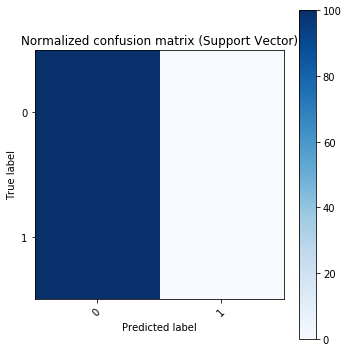

In [202]:
search(xtrain, xval, ytrain, yval)

In [217]:
xtrain.iloc[:,0:512].shape

(14146, 512)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

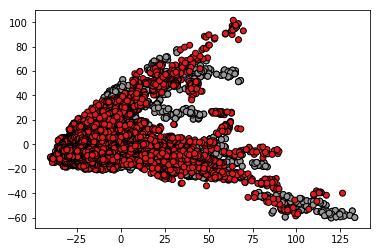

In [218]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

xDataPCA = pca.fit_transform(xtrain.iloc[:,0:512])

# Plot the training points
plt.scatter(xDataPCA[:, 0], xDataPCA[:, 1], c =ytrain, cmap=plt.cm.Set1,edgecolor='k')
plt.show()

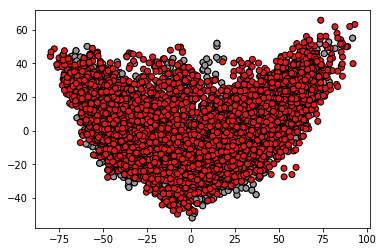

In [219]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
xDataPCA = pca.fit_transform(xtrain.iloc[:,512:])

# Plot the training points
plt.scatter(xDataPCA[:, 0], xDataPCA[:, 1], c =ytrain, cmap=plt.cm.Set1,edgecolor='k')
plt.show()

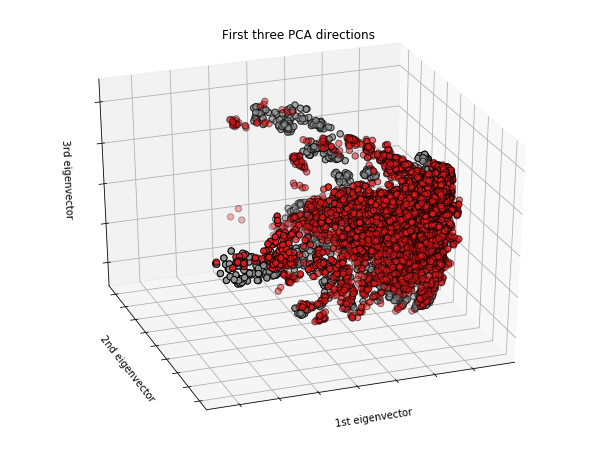

In [220]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(xtrain.iloc[:,0:512])

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=ytrain,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

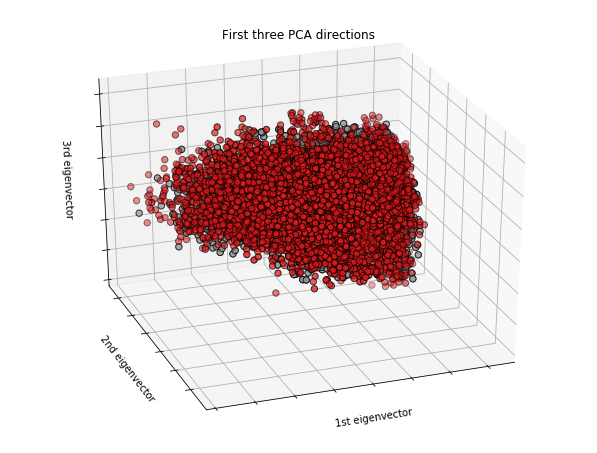

In [221]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(xtrain.iloc[:,512:])

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=ytrain,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

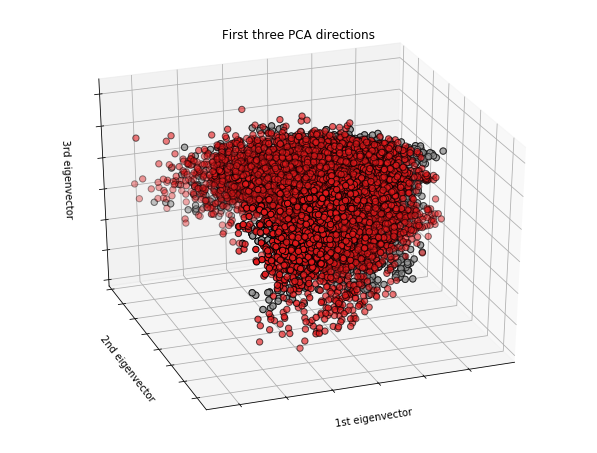

In [222]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

ax.scatter(X_reduced[:, 1], X_reduced[:, 0], X_reduced[:, 2], c=ytrain,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

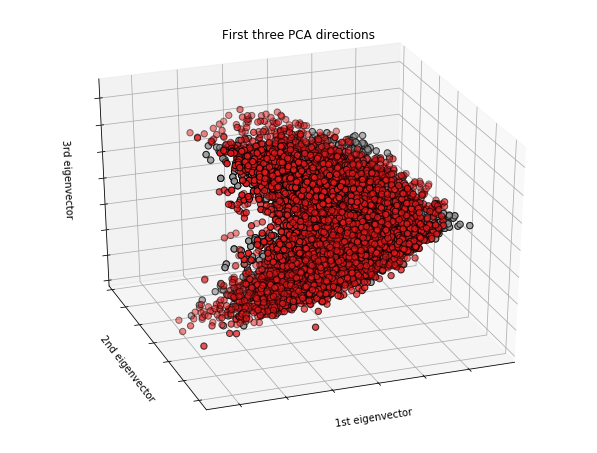

In [223]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

ax.scatter(X_reduced[:, 1], X_reduced[:, 2], X_reduced[:, 0], c=ytrain,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

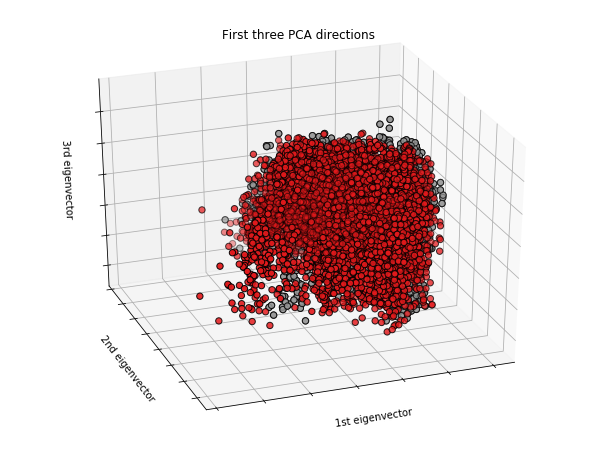

In [224]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

ax.scatter(X_reduced[:, 2], X_reduced[:, 0], X_reduced[:, 1], c=ytrain,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [225]:
xtrain1 = pd.concat([features_train.loc[features_train['point'] == 1,:].iloc[:,5:512+5], features_train.loc[features_train['point'] == 1,:].iloc[:,1028:1028+512]], axis=1)

In [226]:
xtrain2 = pd.concat([features_train.loc[features_train['point'] == 6,:].iloc[:,5:512+5], features_train.loc[features_train['point'] == 6,:].iloc[:,1028:1028+512]], axis=1)

In [237]:
xtrain3 = pd.concat([features_train.loc[features_train['point'] == 11,:].iloc[:,5:512+5], features_train.loc[features_train['point'] == 11,:].iloc[:,1028:1028+512]], axis=1)
xtrain3 = xtrain3.sample(200)

In [238]:
xt = pd.concat([xtrain1,xtrain2,xtrain3])

In [239]:
print(xtrain1.shape, xtrain2.shape, xtrain3.shape)

(186, 1024) (192, 1024) (200, 1024)


In [240]:
y = pd.concat([pd.Series([1]*xtrain1.shape[0]),pd.Series([6]*xtrain2.shape[0]), pd.Series([13]*xtrain3.shape[0])])

In [241]:
print(xt.shape, y.shape)

(578, 1024) (578,)


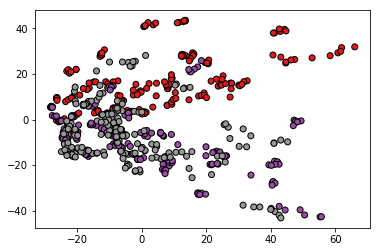

In [244]:
pca = PCA(n_components=2)

xDataPCA = pca.fit_transform(xt.iloc[:,0:512])

# Plot the training points
plt.scatter(xDataPCA[:, 0], xDataPCA[:, 1], c =y, cmap=plt.cm.Set1,edgecolor='k')
plt.show()

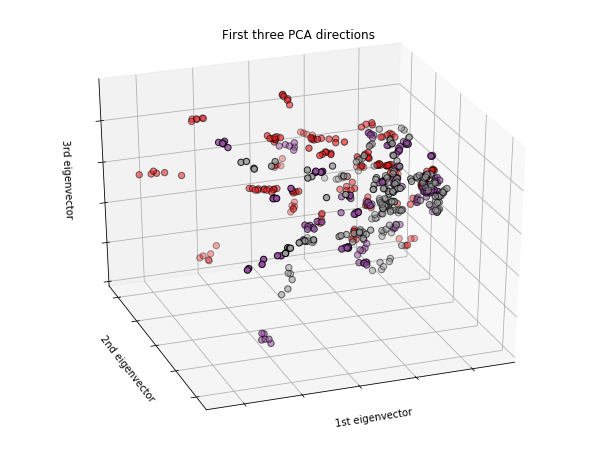

In [245]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(xt.iloc[:,0:512])

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

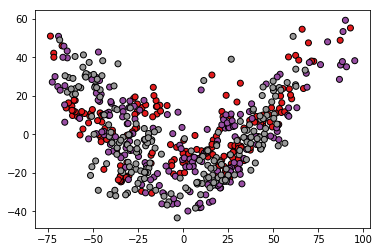

In [246]:
pca = PCA(n_components=2)

xDataPCA = pca.fit_transform(xt.iloc[:,512:])

# Plot the training points
plt.scatter(xDataPCA[:, 0], xDataPCA[:, 1], c =y, cmap=plt.cm.Set1,edgecolor='k')
plt.show()

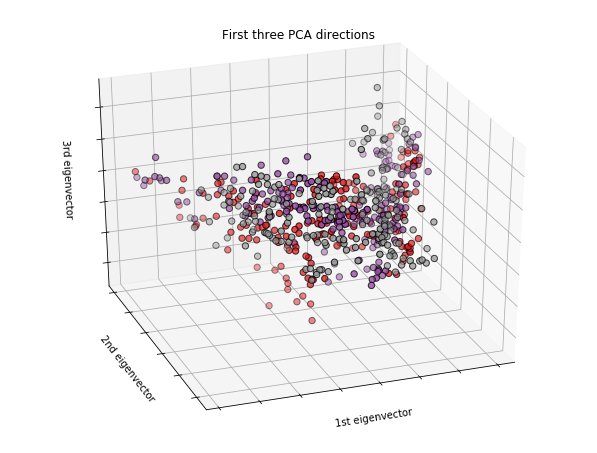

In [247]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(xt.iloc[:,512:])

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()